<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Unidades_B%C3%A1sicas_de_Sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width='20%' alt='Unidades Básicas de Saúde - UBS' src='https://github.com/leonarddocchagas/data_science/blob/master/projetos/unidades_basicas_de_saude/Logo_SUS.png?raw=true' />

## **Unidades Básicas de Saúde - UBS**

As Unidades Básicas de Saúde (UBS) são a porta de entrada preferencial do Sistema Único de Saúde (SUS). O objetivo desses postos é atender até 80% dos problemas de saúde da população, sem que haja a necessidade de encaminhamento para hospitais.

Até setembro de 2011, o país contava com 38 mil UBSs. Nelas, os usuários do SUS podem realizar consultas médicas, curativos, tratamento odontológico, tomar vacinas e coletar exames laboratoriais. Além disso, há fornecimento de medicação básica e também encaminhamentos para especialidades dependendo do que o paciente apresentar.

Em 2011, já foram selecionados 1.219 projetos para construção de UBS. Essas unidades serão construídas em cidades extremamente pobres. Até 2014, estão previstas mais de 25.520 UBS construídas, ampliadas ou reformadas, a partir do censo de infraestrutura da Atenção Básica. Terão prioridade os municípios do Programa Brasil Sem Miséria que ainda não foram contemplados pelos equipamentos.

A expansão das Unidades Básicas de Saúde tem o objetivo de descentralizar o atendimento, dar proximidade à população ao acesso aos serviços de saúde e desafogar os hospitais.

  *Texto explicativo do portal

## Sobre os dados

Dados coletados do site PORTAL BRASILEIRO DE DADOS ABERTOS
  * Ministério da Saúde - MS
      * http://dados.gov.br/dataset/unidades-basicas-de-saude-ubs
      

**Dicionário de Dados**

`vlr_latitude`	Representa a latitude em formato decimal. Considerar valores negativos.

`vlr_longitude`	Representa a longitude em formato decimal. Considerar valores negativos.	
`cod_munic`	Representa o código IBGE do município.

`cod_cnes`	Representa o código CNES - Cadastro Nacional de Estabelecimentos de Saúde	
`nom_estab`	Representa o nome do estabelecimento

`dsc_endereco`	Representa o endereço da unidade

`dsc_bairro`	Representa o nome do Bairro

`dsc_cidade`	Representa o nome da cidade

`dsc_telefone`	Representa o número do telefone

`dsc_estrut_fisic_ambiencia`	Informa a situação em relação a estrutura física e ambiência

`dsc_adap_defic_fisic_idosos`	Informa a situação em relação a adaptações para deficientes e idosos

`dsc_equipamentos`	Informa a situação em relação aos equipamentos

`dsc_medicamentos`	Informa a Situação em relação aos medicamentos

## Abtenção e Transformação dos Dados

In [ ]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# redenrizar mapas
!pip install folium
import folium
from folium import plugins



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# carrega dataset
df = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/unidades_basicas_de_saude/ubs.csv')
df.set_index('cod_cnes', inplace=True)

# retirar colunas desnecessárias
df = df.drop(columns=(['dsc_telefone', 'dsc_endereco']))

# retirar colunas desnecessárias
df['Qtde_registro'] = 1

# exibi dataset
df.head()

,vlr_latitude,vlr_longitude,cod_munic,nom_estab,dsc_bairro,dsc_cidade,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,Qtde_registro
cod_cnes,,,,,,,,,,,
3492,-10.911237,-37.062078,280030,US OSWALDO DE SOUZA,GETULIO VARGAS,Aracaju,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,1
6685315,-9.485943,-35.857573,270770,USF ENFERMEIRO PEDRO JACINTO AREA 09,CENTRO,Rio Largo,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,1
6811299,-23.896000,-53.410000,411885,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,CENTRO,Perobal,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média,1
6335616,-16.447874,-41.009860,313580,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,ALDEIA,Jequitinhonha,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,1
6662226,-6.573311,-35.107605,250930,POSTO ANCORA URUBA,SITIO,Mataraca,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,1


**Tamanho e dados faltantes** 

In [ ]:
# tamanho
print('Entradas: {}' .format(df.shape[0]))
print('Variáveis: {}' .format(df.shape[1]))

Entradas: 37690
Variáveis: 11


In [ ]:
# faltantes
df.isnull().count()

vlr_latitude                   37690
vlr_longitude                  37690
cod_munic                      37690
nom_estab                      37690
dsc_bairro                     37690
dsc_cidade                     37690
dsc_estrut_fisic_ambiencia     37690
dsc_adap_defic_fisic_idosos    37690
dsc_equipamentos               37690
dsc_medicamentos               37690
Qtde_registro                  37690
dtype: int64

Tamanho e dados faltantes do dataset, devem sempre ser verificado logo no início da análise. Por se tratar de um ponto importante e que, caso alguma informação esteja ausente, deve ser tratado. Muitos modelos de Machile Learning não funcionan quando existe dados nulos. 

## Visualizando os Dados

**Mapa da Distribuição por cidade**

In [ ]:
# criando as localiações
coordenadas=[]
for lat,lng in zip(df.vlr_latitude, df.vlr_longitude):
  coordenadas.append([lat,lng])

In [ ]:
# criando mapa
mapa = folium.Map(
    location=[-8.0421584,-35.008676], 
    zoom_start=7, 
    tiles='Stamen Toner'
    )

In [ ]:
# plotando mapa
mapa.add_child(plugins.HeatMap(coordenadas))

In [ ]:
df.dsc_equipamentos.value_counts()#.plot.barh(color='#fb9e70');

Desempenho mediano ou  um pouco abaixo da média    29922
Desempenho acima da média                           6424
Desempenho muito acima da média                     1344
Name: dsc_equipamentos, dtype: int64

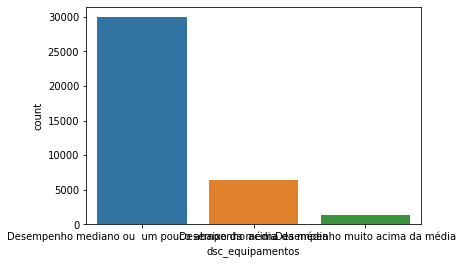

In [ ]:
sns.countplot(df['dsc_equipamentos'])